In [40]:
# Subroutine to plot the graph
def plot_results(history):
    # plot results
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'bo',label = 'Training loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [41]:
# Load the IMDB Dataset
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
embedding_dim = 100
maxlen = 100

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old
word_index = imdb.get_word_index()


In [42]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [43]:
from keras import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4395 - acc: 0.7806 - val_loss: 0.3441 - val_acc: 0.8448
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1396 - acc: 0.9487 - val_loss: 0.4569 - val_acc: 0.8232
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0152 - acc: 0.9958 - val_loss: 0.7534 - val_acc: 0.8170
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 1.1069 - val_acc: 0.8104
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 1.0088e-05 - acc: 1.0000 - val_loss: 1.2593 - val_acc: 0.8148
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 1.8757e-07 - acc: 1.0000 - val_loss: 1.3416 - val_acc: 0.8154
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 1.1425e-07 - acc: 1.0000 - val_loss: 1.357

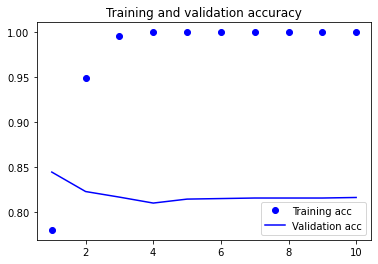

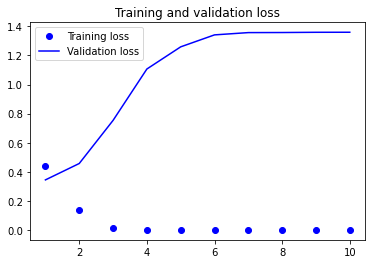

In [44]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train, epochs=10,batch_size=32,validation_split=0.2)
plot_results(history)

In [45]:
acc = model.evaluate(x_test,y_test)
print(acc)

25000/25000 [==============================] - 7s 275us/step
[1.31298466588974, 0.81532]


In [46]:
import os
import numpy as np

glove_dir = "C:/Users/Harsh Vora/Desktop/GloveData"
embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))

# Build an embedding matrix to load the embedding layer
embedding_matrix = np.zeros((max_features,embedding_dim))

for word,i in word_index.items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector
        # else embedding for words not dound in the embedding index will remoain zreos

Found 400000 words vectors.


In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# load embedding matrix and freez embedding layer weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 1,640,129
Trainable params: 640,129
Non-trainable params: 1,000,000
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 889us/step - loss: 0.7099 - acc: 0.5025 - val_loss: 0.6918 - val_acc: 0.5210
Epoch 2/10
20000/20000 [==============================] - 17s 855us/step - loss: 0.6914 - acc: 0.5269 - val_loss: 0.6899 - val_acc: 0.5410
Epoch 3/10
20000/20000 [==============================] - 17s 839us/step - loss: 0.6764 - acc: 0.5716 - val_loss: 0.6933 - val_acc: 0.5484
Epoch 4/10
20000/20000 [==============================] - 16s 819us/step - loss: 0.6434 - acc: 0.6253 - val_loss: 0.7006 - val_acc: 0.5452
Epoch 5/10
20000/20000 [==============================] - 20s 981us/step - loss: 0.6008 - acc: 0.6744 - val_loss: 0.7038 - val_acc: 0.5712
Epoch 6/10
20000/20000 [==============================] - 18s 896us/step - loss: 0.5491 - acc: 0.7198 - val_loss: 0.7484 - val_acc: 0.5640
Epoch 7/10
20000/20000 [==============================] - 17s 836us/step - loss: 0.4914 - acc: 0.7592 - val_loss: 0.9

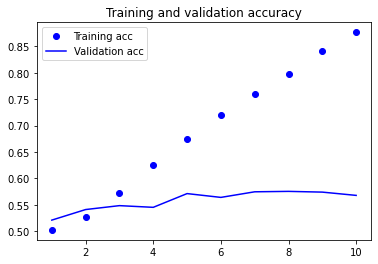

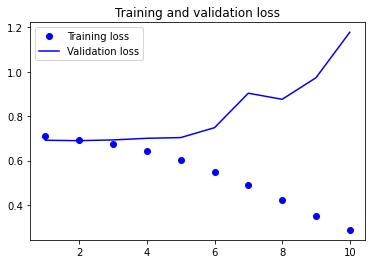

In [48]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
model.save_weights('pre_trained_glove_model_imdb.h5')

plot_results(history)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2100 - acc: 0.9134 - val_loss: 1.0659 - val_acc: 0.6230
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1089 - acc: 0.9582 - val_loss: 1.1625 - val_acc: 0.6534
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0592 - acc: 0.9778 - val_loss: 1.2198 - val_acc: 0.6658
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0305 - acc: 0.9882 - val_loss: 1.4612 - val_acc: 0.6904
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0191 - acc: 0.9922 - val_loss: 1.4411 - val_acc: 0.6960
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 1.5501 - val_acc: 0.7148
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0054 - acc: 0.9977 - val_loss: 1.7377 - val_acc:

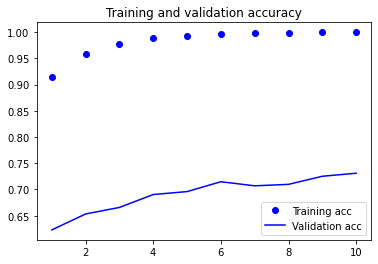

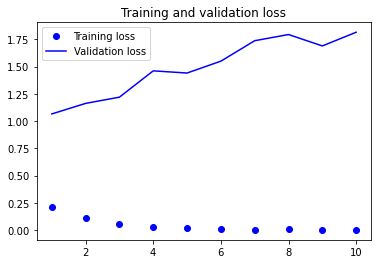

In [49]:
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

plot_results(history)

In [50]:
acc = model.evaluate(x_test,y_test)
print(acc)

25000/25000 [==============================] - 8s 336us/step
[1.8713360898017883, 0.72188]


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4435 - acc: 0.7840 - val_loss: 0.3728 - val_acc: 0.8470
Epoch 2/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2785 - acc: 0.8829 - val_loss: 0.3479 - val_acc: 0.8502
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2290 - acc: 0.9081 - val_loss: 0.3420 - val_acc: 0.8500
Epoch 4/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.1895 - acc: 0.9262 - val_loss: 0.3878 - val_acc: 0.8484
Epoch 5/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1469 - acc: 0.9443 - val_loss: 0.4759 - val_acc: 0.8362
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1055 - acc: 0.9621 - val_loss: 0.4836 - val_acc: 0.8406
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.0667 - acc: 0.9774 - val_loss: 0.6351 - val_acc:

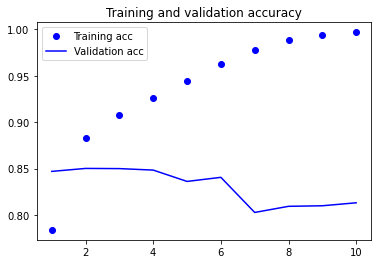

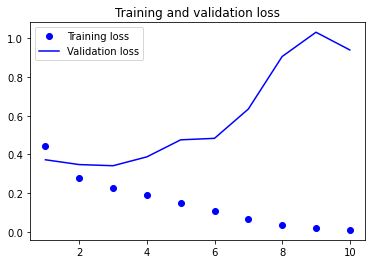

In [51]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,embedding_dim, input_length=maxlen))

model.add(LSTM(64,return_sequences = True))

model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

plot_results(history)

In [52]:
acc = model.evaluate(x_test,y_test)
print(acc)

25000/25000 [==============================] - 19s 754us/step
[0.9618962066936493, 0.80852]
